In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1D Ising model + Transfer matrix

* Construct the transfer matrix at temperature $T$ with external field $B$
* Find the eivenvalues of the transfer matrix and compare to the exact results.
* Evaluate the partition function $Z$ at different system size $N$ and $T$, $B$. Compare to the exact results.
* For a fixed $N$, $T$, $B$, evaluate $\langle S_0 S_j\rangle$ where $j=0,1,\cdots N$. 
* Plot $\langle S_0 S_j\rangle$ up to $j=N/2$ and show that it decays exponentially.
  * Please try several $N$, $T$, $B$. What is the largest $N$ you can go? What is the lowest $T$ you can go?

In [2]:
# Transfer matrix

N= [10, 100, 500, 1000]
T= [1]
B= [0, 1]

J= 1.0
k_B= 1.0

def tran_matrix(T_temp, B_field):
    return np.array([[np.exp(beta(T_temp)*(J+ B_field)) , np.exp(-beta(T_temp)*J)],
                     [np.exp(-beta(T_temp)*J) , np.exp(beta(T_temp)*(J- B_field))]])

def beta(T_temp):
    return 1/(k_B*T_temp)

# Eigenvalues of the transfer matrix

lambdas= np.linalg.eig(tran_matrix(T[0], B[1]))

print('For T=', T[0], ', B=', B[1], '\n\nEigenvalues of transfer matrix = \n', lambdas[0], '\n')

#Exact results of eigenvalues of transfer matrix

exa_lambda1= np.exp(beta(T[0])*J)*(np.cosh(beta(T[0])*B[1]) + np.sqrt((np.sinh(beta(T[0])*B[1]))**2 + np.exp(-4*beta(T[0])*J))) 

exa_lambda2= np.exp(beta(T[0])*J)*(np.cosh(beta(T[0])*B[1]) - np.sqrt((np.sinh(beta(T[0])*B[1]))**2 + np.exp(-4*beta(T[0])*J)))

print('Exact eigenvalues of transfer matrix are \n', exa_lambda1, exa_lambda2)


For T= 1 , B= 1 

Eigenvalues of transfer matrix = 
 [7.41016869 0.97888741] 

Exact eigenvalues of transfer matrix are 
 7.410168692021228 0.9788874069094212


In [3]:
# Partition function z

def z(N_number, T_temp, B_field):
    T_N= np.eye(2)
    for i in range(N_number):
        i
        T_N= T_N @ tran_matrix(T_temp, B_field)
    return np.trace(T_N)

print('For N=', N[0] , ', T=', T[0], ', B=', B[1])
print('\nPartition function z=', z(N[0], T[0], B[1]))

# Exact value of z

def exac_z(N_number, T_temp, B_field):
    return exa_lambda1**N_number + exa_lambda2**N_number

print('Exact partition function z=', exac_z(N[0], T[0], B[1]))


For N= 10 , T= 1 , B= 1

Partition function z= 499207324.1349155
Exact partition function z= 499207324.1349148


In [4]:
imp_matrix= np.array([[1,0],
                      [0,-1]])

def corre_func(i,j,N_number, T_temp, B_field):
    T_N= np.eye(2)
    for k in range(N_number):
        if k==i and k==j:
            T_N= T_N@ imp_matrix@ imp_matrix@ tran_matrix(T_temp, B_field)
        elif k!=i and k==j:
            T_N= T_N@ imp_matrix@ tran_matrix(T_temp, B_field)
        elif k==i and k!=j:
            T_N= T_N@ imp_matrix@ tran_matrix(T_temp, B_field)
        else:
            T_N= T_N@ tran_matrix(T_temp, B_field)
    return (1/z(N_number, T_temp, B_field))*np.trace(T_N)

print('For N=', N[0] , ', T=', T[0], ', B=', B[1], '\n')

print('<S_0,S_j> for')
for i in range(N[0]):
    print('j=',i ,'  ', corre_func(0, i ,N[0], T[0], B[1]))


For N= 10 , T= 1 , B= 1 

<S_0,S_j> for
j= 0    1.0
j= 1    0.9886408607906711
j= 2    0.9871403132163831
j= 3    0.986942097881861
j= 4    0.9869159728358645
j= 5    0.9869129706787
j= 6    0.9869159728358647
j= 7    0.986942097881861
j= 8    0.9871403132163831
j= 9    0.9886408607906711


For N= 10 , T= 1 , B= 0 



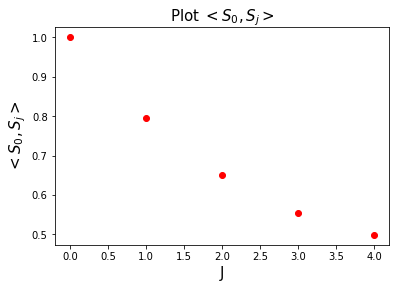

For N= 100 , T= 1 , B= 0 



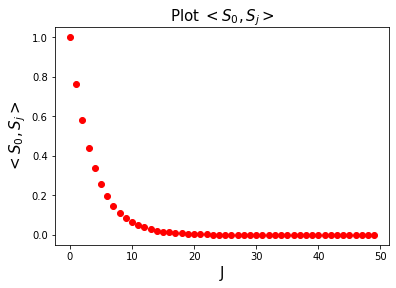

For N= 500 , T= 1 , B= 0 



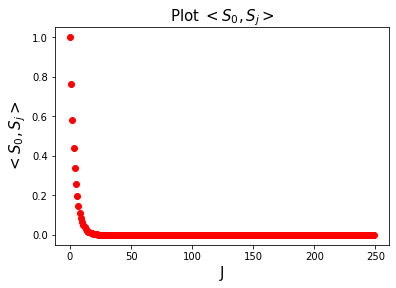

For N= 1000 , T= 1 , B= 0 



<ipython-input-4-8d9372d67b6c>:14: RuntimeWarning: overflow encountered in matmul
  T_N= T_N@ tran_matrix(T_temp, B_field)
<ipython-input-4-8d9372d67b6c>:14: RuntimeWarning: invalid value encountered in matmul
  T_N= T_N@ tran_matrix(T_temp, B_field)
<ipython-input-3-275f49e15cb8>:7: RuntimeWarning: overflow encountered in matmul
  T_N= T_N @ tran_matrix(T_temp, B_field)
<ipython-input-3-275f49e15cb8>:7: RuntimeWarning: invalid value encountered in matmul
  T_N= T_N @ tran_matrix(T_temp, B_field)
<ipython-input-4-8d9372d67b6c>:15: RuntimeWarning: invalid value encountered in double_scalars
  return (1/z(N_number, T_temp, B_field))*np.trace(T_N)


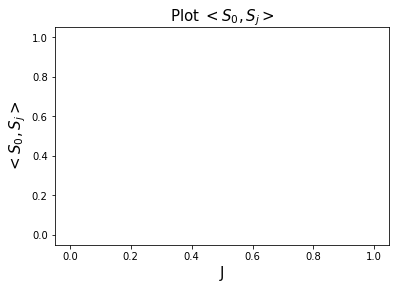

In [5]:










# Plot <S_0,S_j> up to j=N/2
# Finding the largest N

for i in range(len(N)):
    
    print('For N=', N[i] , ', T=', T[0], ', B=', B[0], '\n')

    size= N[i]//2
    x= np.zeros(size)
    y= np.zeros(size)
    for j in range(size):
        x[j]= j
        y[j]= corre_func(0, j, N[i], T[0], B[0])

    plt.plot(x, y, 'ro')
    plt.title('Plot $<S_0,S_j>$', fontsize=15)
    plt.xlabel('J', fontsize=15)
    plt.ylabel('$<S_0, S_j>$', fontsize=15)
    plt.show()
    

For N= 560 , T= 1 , B= 0 



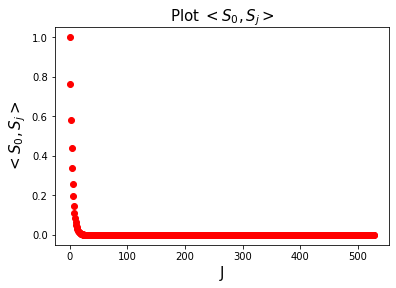

For N= 620 , T= 1 , B= 0 



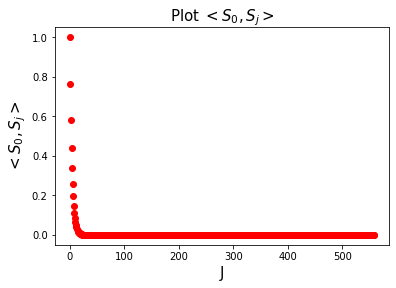

For N= 680 , T= 1 , B= 0 



<ipython-input-4-8d9372d67b6c>:14: RuntimeWarning: overflow encountered in matmul
  T_N= T_N@ tran_matrix(T_temp, B_field)
<ipython-input-4-8d9372d67b6c>:14: RuntimeWarning: invalid value encountered in matmul
  T_N= T_N@ tran_matrix(T_temp, B_field)
<ipython-input-3-275f49e15cb8>:7: RuntimeWarning: overflow encountered in matmul
  T_N= T_N @ tran_matrix(T_temp, B_field)
<ipython-input-3-275f49e15cb8>:7: RuntimeWarning: invalid value encountered in matmul
  T_N= T_N @ tran_matrix(T_temp, B_field)
<ipython-input-4-8d9372d67b6c>:15: RuntimeWarning: invalid value encountered in double_scalars
  return (1/z(N_number, T_temp, B_field))*np.trace(T_N)
/home/nam/anaconda3/envs/course/lib/python3.8/site-packages/numpy/core/fromnumeric.py:1686: RuntimeWarning: overflow encountered in reduce
  return asanyarray(a).trace(offset=offset, axis1=axis1, axis2=axis2, dtype=dtype, out=out)


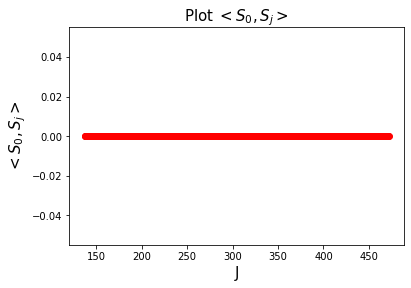

In [6]:

N1= 500
step= 60
for i in range(1, 4):
    
    print('For N=', N1+step*i , ', T=', T[0], ', B=', B[0], '\n')

    size= N1+step*i //2
    x= np.zeros(size)
    y= np.zeros(size)
    for j in range(size):
        x[j]= j
        y[j]= corre_func(0, j, N1+step*i, T[0], B[0])

    plt.plot(x, y, 'ro')
    plt.title('Plot $<S_0,S_j>$', fontsize=15)
    plt.xlabel('J', fontsize=15)
    plt.ylabel('$<S_0, S_j>$', fontsize=15)
    plt.show()

For N= 625 , T= 1 , B= 0 



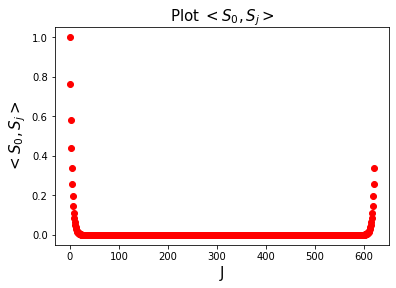

For N= 630 , T= 1 , B= 0 



<ipython-input-4-8d9372d67b6c>:14: RuntimeWarning: overflow encountered in matmul
  T_N= T_N@ tran_matrix(T_temp, B_field)
<ipython-input-3-275f49e15cb8>:7: RuntimeWarning: overflow encountered in matmul
  T_N= T_N @ tran_matrix(T_temp, B_field)
/home/nam/anaconda3/envs/course/lib/python3.8/site-packages/numpy/core/fromnumeric.py:1686: RuntimeWarning: overflow encountered in reduce
  return asanyarray(a).trace(offset=offset, axis1=axis1, axis2=axis2, dtype=dtype, out=out)
<ipython-input-4-8d9372d67b6c>:15: RuntimeWarning: invalid value encountered in double_scalars
  return (1/z(N_number, T_temp, B_field))*np.trace(T_N)


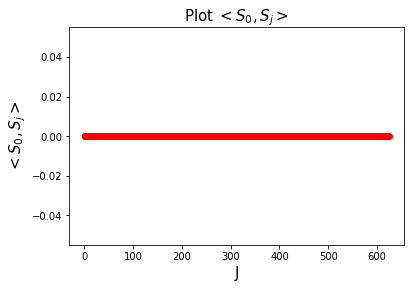

In [7]:

N1= 620
step= 5
for i in range(1, 3):
    
    print('For N=', N1+step*i , ', T=', T[0], ', B=', B[0], '\n')

    size= N1+step*i //2
    x= np.zeros(size)
    y= np.zeros(size)
    for j in range(size):
        x[j]= j
        y[j]= corre_func(0, j, N1+step*i, T[0], B[0])

    plt.plot(x, y, 'ro')
    plt.title('Plot $<S_0,S_j>$', fontsize=15)
    plt.xlabel('J', fontsize=15)
    plt.ylabel('$<S_0, S_j>$', fontsize=15)
    plt.show()

For N= 629 , T= 1 , B= 0 



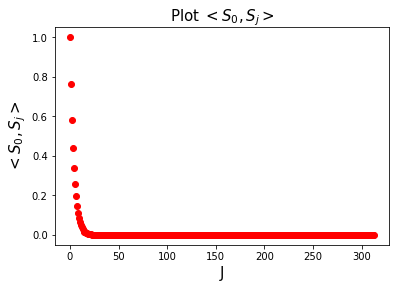

In [8]:

N1= 629
    
print('For N=', N1 , ', T=', T[0], ', B=', B[0], '\n')

size= N1 //2
x= np.zeros(size)
y= np.zeros(size)
for j in range(size):
    x[j]= j
    y[j]= corre_func(0, j, N1, T[0], B[0])

plt.plot(x, y, 'ro')
plt.title('Plot $<S_0,S_j>$', fontsize=15)
plt.xlabel('J', fontsize=15)
plt.ylabel('$<S_0, S_j>$', fontsize=15)
plt.show()

In [9]:
print('The largest N= 629,   for T=1, B=0')

The largest N= 629,   for T=1, B=0


For N= 10 , T= 0.6 , B= 0 



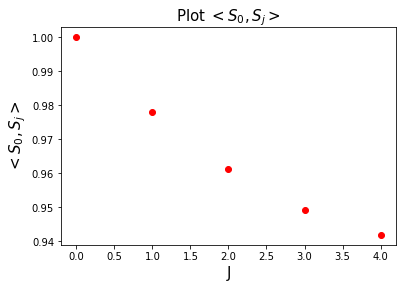

For N= 10 , T= 0.19999999999999996 , B= 0 



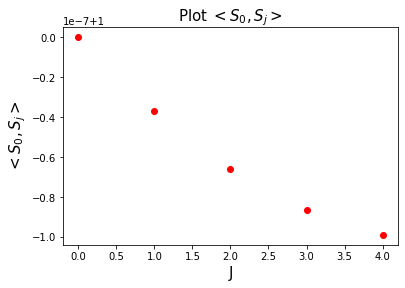

For N= 10 , T= -0.20000000000000018 , B= 0 



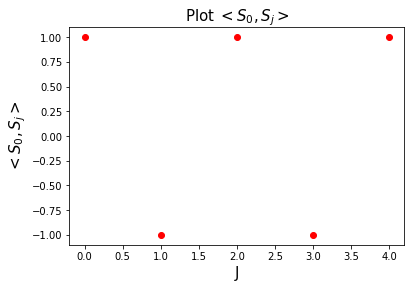

In [10]:













# Finding the lowest T

N1= 10
T1= 1
step= 0.4
for i in range(1, 4):
    
    print('For N=', N1 , ', T=', T1-step*i, ', B=', B[0], '\n')

    size= N1 //2
    x= np.zeros(size)
    y= np.zeros(size)
    for j in range(size):
        x[j]= j
        y[j]= corre_func(0, j, N1, T1-step*i, B[0])

    plt.plot(x, y, 'ro')
    plt.title('Plot $<S_0,S_j>$', fontsize=15)
    plt.xlabel('J', fontsize=15)
    plt.ylabel('$<S_0, S_j>$', fontsize=15)
    plt.show()

For N= 10 , T= 0.16 , B= 0 



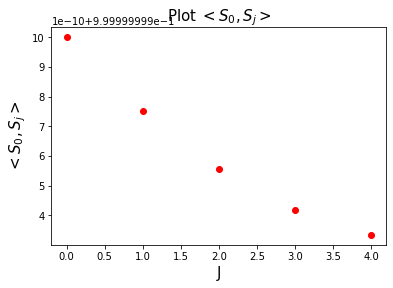

For N= 10 , T= 0.12000000000000001 , B= 0 



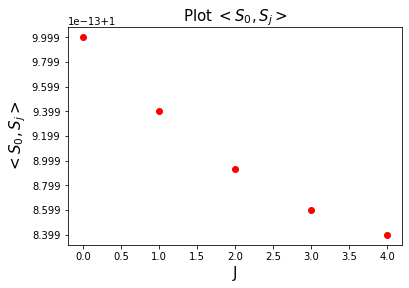

For N= 10 , T= 0.08000000000000002 , B= 0 



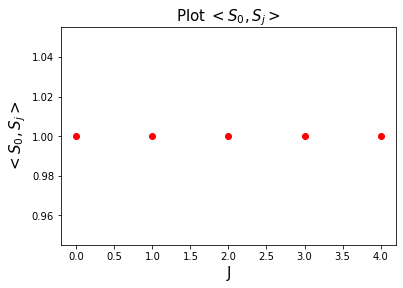

In [11]:

N1= 10
T1= 0.2
step= 0.04
for i in range(1, 4):
    
    print('For N=', N1 , ', T=', T1-step*i, ', B=', B[0], '\n')

    size= N1 //2
    x= np.zeros(size)
    y= np.zeros(size)
    for j in range(size):
        x[j]= j
        y[j]= corre_func(0, j, N1, T1-step*i, B[0])

    plt.plot(x, y, 'ro')
    plt.title('Plot $<S_0,S_j>$', fontsize=15)
    plt.xlabel('J', fontsize=15)
    plt.ylabel('$<S_0, S_j>$', fontsize=15)
    plt.show()

For N= 10 , T= 0.118 , B= 0 



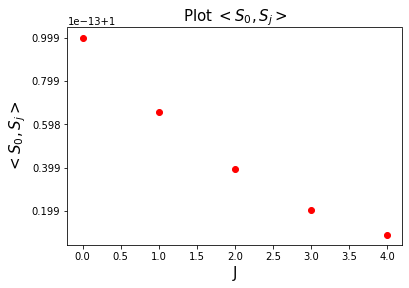

For N= 10 , T= 0.11599999999999999 , B= 0 



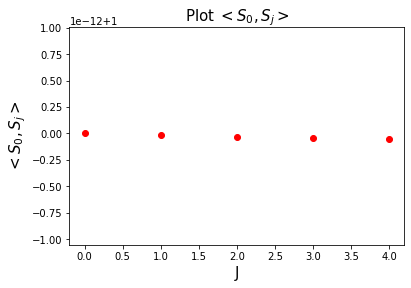

In [12]:
N1= 10
T1= 0.12
step= 0.002

for i in range(1,3):
    
    print('For N=', N1 , ', T=', T1-step*i, ', B=', B[0], '\n')

    size= N1 //2
    x= np.zeros(size)
    y= np.zeros(size)
    for j in range(size):
        x[j]= j
        y[j]= corre_func(0, j, N1, T1-step*i, B[0])

    plt.plot(x, y, 'ro')
    plt.title('Plot $<S_0,S_j>$', fontsize=15)
    plt.xlabel('J', fontsize=15)
    plt.ylabel('$<S_0, S_j>$', fontsize=15)
    plt.show()


For N= 10 , T= 0.118 , B= 0 



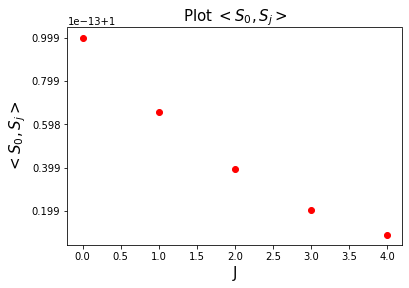

For N= 10 , T= 0.11789999999999999 , B= 0 



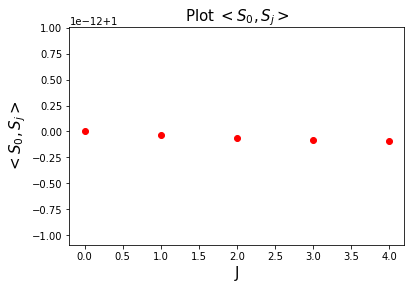

In [13]:
N1= 10
T1= 0.118
step= 0.0001

for i in range(2):
    
    print('For N=', N1 , ', T=', T1-step*i, ', B=', B[0], '\n')

    size= N1 //2
    x= np.zeros(size)
    y= np.zeros(size)
    for j in range(size):
        x[j]= j
        y[j]= corre_func(0, j, N1, T1-step*i, B[0])

    plt.plot(x, y, 'ro')
    plt.title('Plot $<S_0,S_j>$', fontsize=15)
    plt.xlabel('J', fontsize=15)
    plt.ylabel('$<S_0, S_j>$', fontsize=15)
    plt.show()

In [14]:
print('The largest N= 629,   for T=1, B=0')
print('The lowest T= 0.118,   for N=10, B=0')

The largest N= 629,   for T=1, B=0
The lowest T= 0.118,   for N=10, B=0
